In [1]:
from utils.models import runfullseasonpredictor
from utils.mining_data_tb import getnbafromoddsportal
from utils.mining_data_tb import getnbafrommassey
from utils.sql_tb import nbacleantomysql
from utils.folders_tb import opennbacsv
from utils.folders_tb import openmodelresults
from utils.sql_tb import getpredictiontablefromsql
from utils.sql_tb import getfullnbatablefromsql
from utils.models import gamepredictor
from utils.models import multimodelcomparision
from utils.models import runfullseasonpredictor

# <u> Collect Data </u>

This project is obtained from two websites via webscraping, <u>https://masseyratings.com/nba/games </u> and <u>https://www.oddsportal.com/basketball/usa/nba/results/#/page/1 </u>.

Each game is sent to a json dictionary in the DATA folder and joined together with the relevant information from each page into a file called <u>nbaclean.csv</u> which is also sent to mySQL into the table named <u>daniel_walker</u>.

### **Beware, each may take up to a few hours to complete.**


In [ ]:
# BEWARE, THESE FUNCTIONS TAKE HOURS TO COMPLETE, to avoid unexpected errors the dictionaries made to jsons are set up to use new files instead of overwriting the existing ones

getnbafrommassey('https://masseyratings.com/nba/games?dt=20210601', maxdate=(datetime.today().strftime('%Y%m%d')))

getnbafromoddsportal(2)

In [2]:
nbacleantomysql("nbaclean.csv")

nbaclean.csv appended to daniel_walker table in database


'Done'

# <u> Game Prediction</u>

To make the first prediction, the program is given a team name, the game number that needs to be predicted, the regressor to be used and a variable.

The function will print the useful information regarding the game, the prediction, and also the result to see if the prediction was correct.


### **The function can also be called from the Streamlit app.**

In [2]:
Team = "Utah Jazz"
Gamenumber = 30
regressor = "DecisionTreeRegressor"
eon = "mse" #eon means ESTIMATOR (used in RandomForestRegressor, recommend 100), CRITERION (used in DecisionTreeRegressor, recommend mse) or
        #N_NEIGHBORS (used in KNeighborsRegressor, recommend 4)


gamepredictor(Team, Gamenumber, regressor= regressor, eon=eon)

Utah Jazz in game 30 vs Los Angeles Clippers
-----------------------------
Bookies predicted points for Utah Jazz is: 111
-----------------------------
Utah Jazz last 10 games scoring Avg is: 120.38
-----------------------------
Over the previous 10 games Los Angeles Clippers receiving Avg is: 110.7
-----------------------------
In Los Angeles Clippers previous 10 games, 7.0 of their games have gone over the bookies prediction
-----------------------------
SYSTEM PREDICTED score:  119.8
-----------------------------
Using the variable prediction, the programs recommendation is: Not conclusive
-----------------------------
The SYSTEMS STRAIGHT PREDICTION is: Over the bookies prediction
-----------------------------
Final Score (Real):  114
-----------------------------
The SYSTEM STRAIGHT PREDICTION was:  Correct
-----------------------------


# <u> Generate Whole Season Prediction Results For A Single Team Or A List Of Teams Using A Single Model or List Of Models </u>

Run this function with a list of Team Names and a list using the 10 regression models below. The models will run using their default settings. 

The function will print a line graph and a donut graph for each team and each model given in the lists. It will print a shortend results DF, it will also save the two images in RESOURCES and then two CSV files with a summary of the overall results and detailed Game-By-Game results for any further analysis required.

BayesianRidge

DecisionTreeRegressor

GaussianProcessRegressor

GradientBoostingRegressor

KNeighborsRegressor

LinearRegression

RadiusNeighborsRegressor

RandomForestRegressor

RidgeCV

SVR




In [1]:
Team = ["Atlanta Hawks"]
regressorlist = ["DecisionTreeRegressor"]


multimodelcomparision(Team, regressorlist)

NameError: name 'multimodelcomparision' is not defined

# <u>Run function that takes a regressor and then a variable to simulate the season and store the overall results in csv and mySQL </u>
The function simulates the whole season from game 10, game by game, team by team.
For each game the program trains and fits each model and makes a prediction using information from the previous 10 games.
The prediction made for each game is whether the predicted team score will be greater or lower than the bookies prediction.
If this prediction was correct, then that game would win the 1€ bet (returns 0.83€ as the odds are 1.83), if the prediction loses, then the 1€ bet is lost.
The teams results are stored in a dataframe to then be inserted into another function which totals up the columns and appends the overall results for the regressor and variable into a csv file and into a mySQL table named prediction.

For each game and each team <u>(1860 games)</u> a model is fitted with the scores available from the previous 10 games. This means that not every model is saved. The first model is saved in the MODELS folder.

## The following regressors can be used:
BayesianRidge

DecisionTreeRegressor

GaussianProcessRegressor

GradientBoostingRegressor

KNeighborsRegressor

LinearRegression

RadiusNeighborsRegressor

RandomForestRegressor

RidgeCV

SVR



RandomForestRegressor
Model Pickle Saved


<Figure size 720x360 with 0 Axes>

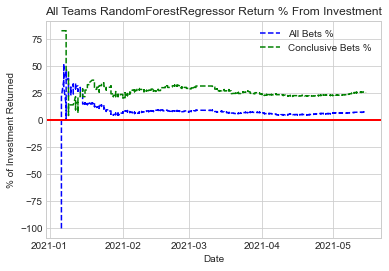

Line Graph Saved
CSV Saved
Model result appended to prediction table in database


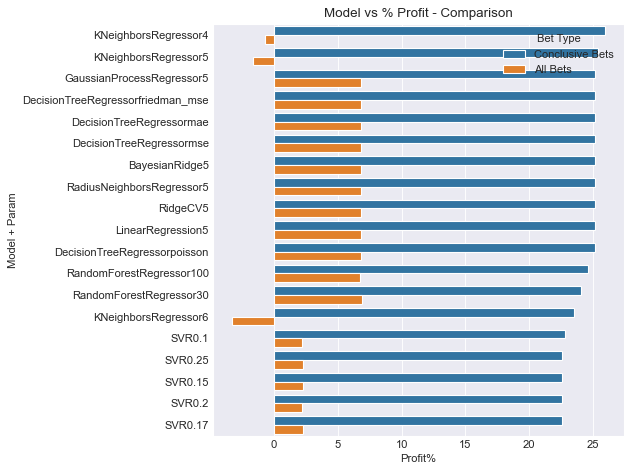

Appending done
                 Scenario Correct BetProfit
0         All Predictions  58.42%     6.91%
1  Conclusive Predictions  67.79%    24.05%
2              Break Even  55.00%       NaN


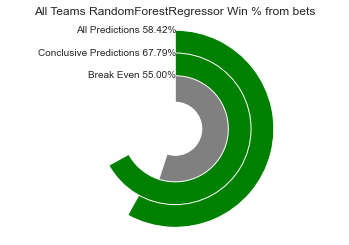

Donut Saved


'Completed'

In [2]:
regressor = ["KNeighborsRegressor"]
eon = 3 #eon means ESTIMATOR (used in RandomForestRegressor, recommend 100), CRITERION (used in DecisionTreeRegressor, recommend mse),
        #N_NEIGHBORS (used in KNeighborsRegressor, recommend 4), EPSILON (used in SVR, recommend 0.15)

runfullseasonpredictor(regressor, eon)


# <u>View these DataFrames from either DATA csv files or from mySQL:</u>

Cleaned dataset without % formats and without unnecessary columns.

Overall Model Results

### **This function can also be called from the Streamlit app.**

In [ ]:
opennbacsv("nbaclean.csv")

In [ ]:
getfullnbatablefromsql()

In [ ]:
openmodelresults("modelresults.csv")

In [ ]:
getpredictiontablefromsql()